In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone

c = 299792458.0

L1, L2, L5 = 1575.42e6, 1227.60e6, 1176.45e6
E1, E5a, E5b = 1575.42e6, 1176.45e6, 1207.14e6
B1, B5, B7 = 1575.42e6, 1176.45e6, 1207.14e6
G1, G2 = 1575.42e6, 1245.78e6   # G2 center
SIG_FREQS = {'G1C': L1, 'G2L': L2, 'G2S': L2, 'E1C': E1, 'E7Q': E5b, 'B1D': L1, 'B1X': L1, 'B5D': B7, 'B7D': B7,
                'R1C': G1,  'R2C': G2}

    sigMap = {0: 'G1C', 3: 'G2L', 4: 'G2S', 20: 'E1C', 21: 'E1B', 25: 'E7I', 26: 'E7Q', 
             30: 'B1D', 31: 'B1X', 32: 'B5D', 33: 'B7D',
             50: 'J1C', 54: 'J2S', 55: 'J2L',
             60: 'R1C', 62: 'R2C',
             998: 'XXX', 999: '---'}

rawx_file = '/Users/dorsic/Documents/PhD/Measurements/SMU-2022-09-24/Week4/ublox/pseudorange-59877.txt'
clock_file = '/Users/dorsic/Documents/PhD/Measurements/SMU-2022-09-24/Week4/ublox/clock-59877.txt'
rinex_file = '/Users/dorsic/Documents/PhD/Measurements/SMU-2022-09-24/Week4/processed/pseudorange-59877-2h.rno'

In [2]:
df = pd.read_csv(rawx_file, sep='\t')
df['DATE'] = pd.to_datetime(df.TS, utc=True, unit='s')
df.sort_values(by=['TS', 'SAT', 'SIG'], inplace=True)
dfc = pd.read_csv(clock_file, sep='\t')
df.head(5)

,LCL,TS,MJD,SAT,SIG,PSEUDORANGE,CARRIERPHASE,DOPPLER,CNO,PRSTD,...,LOCKTIME,PRVALID,CPVALID,HALFCYC,SUBHALFCYC,LEAPS,LEAPSEC,CLKRESET,RESERVED1,DATE
20,1.666656e+09,1.666656e+09,59877.000004,C05,B1X,3.809927e+07,1.983929e+08,-586.376953,36,5,...,30980,1,1,1,1,18,1,0,16605953,2022-10-25 00:00:17.996000+00:00
44,1.666656e+09,1.666656e+09,59877.000004,C05,B7D,3.809926e+07,1.534099e+08,-453.596924,39,4,...,64500,1,1,1,1,18,1,0,16605953,2022-10-25 00:00:17.996000+00:00
18,1.666656e+09,1.666656e+09,59877.000004,C08,B1D,3.707459e+07,1.930571e+08,-1448.540894,34,5,...,64500,1,1,1,0,18,1,0,16605953,2022-10-25 00:00:17.996000+00:00
42,1.666656e+09,1.666656e+09,59877.000004,C08,B5D,3.707458e+07,1.492840e+08,-1120.372681,40,3,...,64500,1,1,1,1,18,1,0,16605953,2022-10-25 00:00:17.996000+00:00
6,1.666656e+09,1.666656e+09,59877.000004,C13,B1D,3.641273e+07,1.896107e+08,-951.066406,38,4,...,64500,1,1,1,1,18,1,0,16605953,2022-10-25 00:00:17.996000+00:00


In [15]:
df.where(df['SAT']=='G10')[['SAT', 'SIG']].drop_duplicates()

,SAT,SIG
20,NaN,NaN
139398,G10,G1C
147368,G10,G2S
147434,G10,G2L


<AxesSubplot:xlabel='TS'>

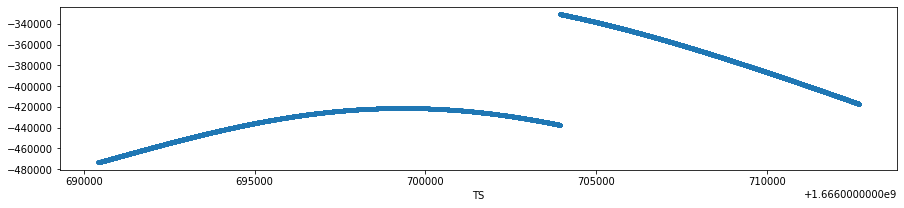

In [28]:
sat, sig = 'G07', ('G1C', 'G2L')
sat, sig = 'G07', ('G1C', 'G2L')
#sat, sig = 'E10', ('E1C', 'E7Q')
dl1 = df.loc[(df.SAT == sat) & (df.SIG == sig[0])].copy()
dl2 = df.loc[(df.SAT == sat) & (df.SIG == sig[1])].copy()
dl1['CPR'] = dl1.CARRIERPHASE * c/1575.42e6
dl2['CPR'] = dl2.CARRIERPHASE * c/1207.14e6
dl1.set_index('TS', inplace=True)
dl2.set_index('TS', inplace=True)
dl12 = dl1.merge(dl2, on='TS', suffixes=('_L1', '_L2'))
dl12['GeomFree_CPR'] = dl1.CPR-dl2.CPR
dl12['GeomFree_CPR'] = dl1.CPR-dl2.CPR
dl12.GeomFree_CPR.plot(style='.', figsize=(15,3))

In [48]:
dl12.iloc[0]

LCL_L1                               1662422400.276756
MJD_L1                                    59828.000003
SAT_L1                                             E04
SIG_L1                                             E1C
PSEUDORANGE_L1                         25147602.452008
CARRIERPHASE_L1                       132151590.649179
DOPPLER_L1                                -2892.819336
CNO_L1                                              28
PRSTD_L1                                             8
CPSTD_L1                                             6
DOSTD_L1                                             8
LOCKTIME_L1                                      20220
PRVALID_L1                                           1
CPVALID_L1                                           1
HALFCYC_L1                                           1
SUBHALFCYC_L1                                        0
LEAPS_L1                                            18
LEAPSEC_L1                                           1
CLKRESET_L